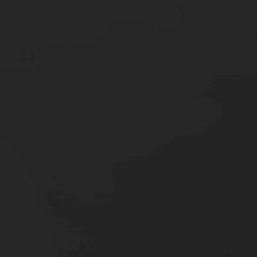

In [1]:
from PIL import Image

url="/media/Gui2/thermix/ARThermal/suenos_dorados_3_frames_no_movement/14_tim/3/Users_golden5s_unkown_2016-06-22_23%3A25%3A46.000000_1/0_0.png"

img = Image.open(url)
img
